In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

In [2]:
img = cv2.imread('chessboard.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

dst = cv2.dilate(dst,None)

img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

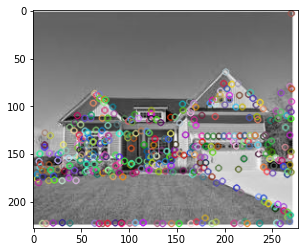

In [11]:
img2 = cv2.imread('home.jpg')
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

img3 = cv2.drawKeypoints(gray,kp,img2)
cv2.imwrite('sift_keypoints.jpg',img3)
plt.imshow(img2)

In [18]:
img2 = cv2.imread('butterfly.jpg',0)
surf = cv2.xfeatures2d.SIFT_create(400)
kp,des= surf.detectAndCompute(img,None)
len(kp)

400

In [20]:
surf.setHessianThreshold(50000)

AttributeError: 'cv2.SIFT' object has no attribute 'setHessianThreshold'

Threshold: 10
nonmaxSuppresion:True
neighborhood:2
Total keypoints with nonmaxSuppresion:822
Total Keypounts without nonmaxSuppresion:5724


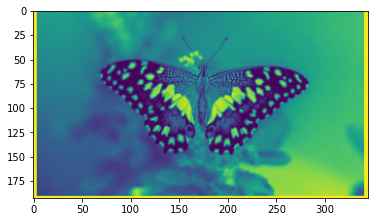

In [4]:
img3 = cv2.imread('butterfly.jpg',0)

fast = cv2.FastFeatureDetector_create()
kp = fast.detect(img3,None)
img4 = cv2.drawKeypoints(img3, kp, None,color=(255,0,0))

print("Threshold: {}".format(fast.getThreshold()))
print("nonmaxSuppresion:{}".format(fast.getNonmaxSuppression()))
print("neighborhood:{}".format(fast.getType()))
print("Total keypoints with nonmaxSuppresion:{}".format(len(kp)))
cv2.imwrite('fast_true.png',img4)

fast.setNonmaxSuppression(0)
kp = fast.detect(img3,None)
print("Total Keypounts without nonmaxSuppresion:{}".format(len(kp)))
img5 = cv2.drawKeypoints(img3, kp, None,color=(255,0,0))
cv2.imwrite('fast_true.png',img5)
plt.imshow(img3)

32
(114, 32)


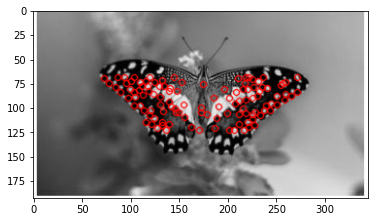

(<matplotlib.image.AxesImage at 0x23da2d62d00>, None)

In [5]:
img = cv2.imread('butterfly.jpg',0)
star = cv2.xfeatures2d.StarDetector_create()
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
kp = star.detect(img,None)
kp,des = brief.compute(img,kp)
print(brief.descriptorSize())
print(des.shape)
img2 = cv2.drawKeypoints(img,kp,None,(255,0,0))
plt.imshow(img2),plt.show()

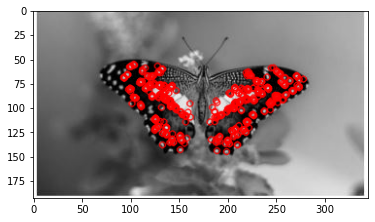

(<matplotlib.image.AxesImage at 0x23da2da1880>, None)

In [6]:
img3 = cv2.imread('butterfly.jpg',0)
orb = cv2.ORB_create()

kp = orb.detect(img3,None)

kp,des = orb.compute(img,kp)
img4 = cv2.drawKeypoints(img3,kp,None,(255,0,0),flags=0)
plt.imshow(img4),plt.show()

In [7]:
img1 = cv2.imread('butterfly2.jpg',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('butterfly.jpg',cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()

kp1 ,des1 = orb.detectAndCompute(img1,None)
kp2 ,des2 = orb.detectAndCompute(img2,None)

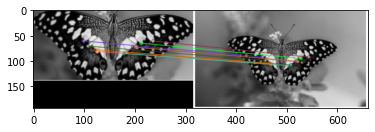

In [8]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches= sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

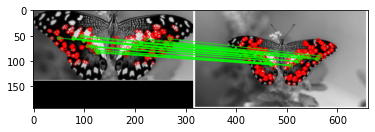

(<matplotlib.image.AxesImage at 0x23da939c940>, None)

In [10]:
img3 = cv2.imread('butterfly2.jpg',cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('butterfly.jpg',cv2.IMREAD_GRAYSCALE)

sift = cv2.xfeatures2d.SIFT_create()
kp1 ,des1 = orb.detectAndCompute(img3,None)
kp2 ,des2 = orb.detectAndCompute(img4,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(np.asarray(des1,np.float32),np.asarray(des2,np.float32),k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT)
img5 = cv2.drawMatchesKnn(img3,kp1,img4,kp2,matches,None,**draw_params)
plt.imshow(img5,),plt.show()